In [31]:
# download the dataset and normalise

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

#load the consolidated dataset
df = pd.read_csv(r'C:\Users\alexm\FX_project\2000_2024\data2.csv')

# remove extra rows and columns
df = df.iloc[200:5383, 0:62]

# reformat Local time variable as a datetime
from datetime import datetime

df['Date'] = df['Date'].str[6:10] +'-'+ df['Date'].str[3:5] +'-'+ df['Date'].str[0:2]
df['Date'] = pd.to_datetime(df['Date'])

# normalise data

df_norm = df.iloc[:, 5:]
df_dates = df.iloc[:, :5]

for col in df_norm.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].mean())/ df_norm[col].std()

x = df_norm.to_numpy()
y = df_dates.to_numpy()
cols = df.columns
z = np.append(y,x, axis=1)

df_norm2 = pd.DataFrame(z, columns=cols)

# add an integer series to replace date for use in the ANN
df_norm2['DateID'] = range(df_norm2.shape[0])
first_column = df_norm2.pop('DateID') 
df_norm2.insert(0, 'DateID', first_column)

df_norm2.iloc[:,2:] = df_norm2.iloc[:,2:].astype(float)

df_norm2.info()

C:\Users\alexm\AppData\Local\Temp\ipykernel_12988\4247761149.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\alexm\FX_project\2000_2024\data2.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateID           5183 non-null   int64         
 1   Date             5183 non-null   datetime64[ns]
 2   Day              5183 non-null   float64       
 3   Month            5183 non-null   float64       
 4   Year             5183 non-null   float64       
 5   Close_Mid        5183 non-null   float64       
 6   Volume_Bid       5183 non-null   float64       
 7   Volume_Ask       5183 non-null   float64       
 8   Volume_Tot       5183 non-null   float64       
 9   Close_Sprd       5183 non-null   float64       
 10  5D-MA            5183 non-null   float64       
 11  10D-MA           5183 non-null   float64       
 12  20D-MA           5183 non-null   float64       
 13  50D-MA           5183 non-null   float64       
 14  200D-MA          5183 non-null   float64

In [18]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(data[:,1])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=735.376, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# test for stationarity



(array([ 13.,  45., 218., 533., 649., 314., 268., 184., 334., 560., 557.,
        242., 108., 192., 225., 216., 124., 273., 103.,  25.]),
 array([1.06895  , 1.1208775, 1.172805 , 1.2247325, 1.27666  , 1.3285875,
        1.380515 , 1.4324425, 1.48437  , 1.5362975, 1.588225 , 1.6401525,
        1.69208  , 1.7440075, 1.795935 , 1.8478625, 1.89979  , 1.9517175,
        2.003645 , 2.0555725, 2.1075   ]),
 <BarContainer object of 20 artists>)

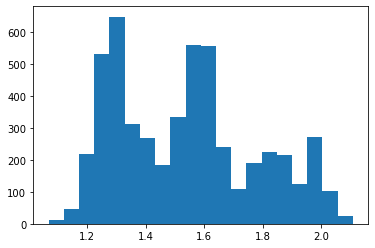

In [20]:
# check the distribution shape
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(data[:,1], bins=20)


In [19]:
# Spearman rank correlation
from scipy.stats import spearmanr


rho, p = spearmanr(data[:,0], data[:,1])

print(rho)
print(p)

# with p value so small it is not statistically significant
# we have to reject that this feature is correlated to the target

0.14220081344979127
8.038435678793468e-25


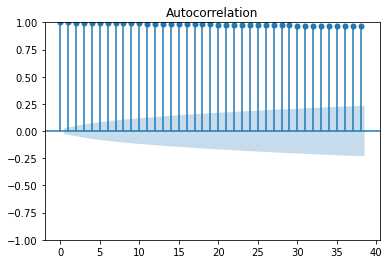

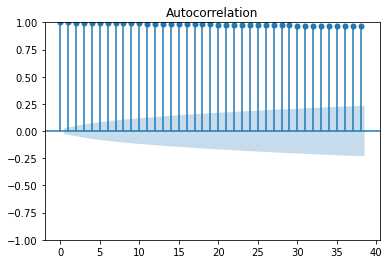

In [22]:
# autocorrelations
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# calculate autocorrelations and confidence interval with significance = alpha
plot_acf(data[:,1], alpha = 0.05)

# taking a long timeseries seems to lose any indication of structure here. Maybe we can look at this data piecewise

C:\Users\alexm\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


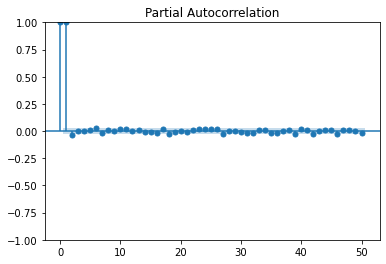

In [23]:
# partial autocorrelations
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data[:,1], lags=50)
pyplot.show()

# here we see a lag of 2 contains all the autocorrelation for the full timeseries.
# Again it looks like all the information has been diluted out of this data

In [ ]:
# 